# Problem 1: Exploratory Data Analysis

To understand the relationships among institutional and macroeconomic variables, an exploratory anaylsis is used upon the four indicators: Corruption, peace, legal quality and GDP Growth. The goal of the anaysis is to identify any potential patterns or clusters, and assess if there's any possible correlations among the variables before clustering techniques are applied. The following preperation data codes are used to extract the data from the file "countryriskdata.csv" into a table for graphic representation


### Data preparation for Explatory Data Analysis

In [3283]:
import pandas as pd

# Load the country risk data
df = pd.read_csv("countryriskdata.csv")

# Inspecting the first few rows (Values were check and nothing is missing)
df.head()

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,39,1.867,3.822,5.000
1,Algeria,DZ,34,2.213,4.160,4.202
2,Argentina,AR,36,1.957,4.568,-2.298
3,Armenia,AM,33,2.218,4.126,0.208
4,Australia,AU,79,1.465,8.244,2.471


In [3284]:
# Finding the maximum and minimum values to calculate the range for each feature
features = ["Corruption", "Peace", "Legal", "GDP Growth"]

scale_table = pd.DataFrame({
    "min": df[features].min(),
    "max": df[features].max()
})

scale_table["range"] = scale_table["max"] - scale_table["min"]

scale_table.sort_values("range", ascending=False)

,min,max,range
Corruption,14.000,90.000,76.000
GDP Growth,-18.000,7.958,25.958
Legal,2.728,8.633,5.905
Peace,1.192,3.399,2.207


#### Summary of statistics
A summary of statistics were produced to anaylze the numerical magnitude / spread of each variable. From the statistics, range is represented by max value subtracted by min value. From the calcluations, corruption seems to have the biggest range (76) while the smallest range is represented by variable peace (Around 2.21). 

## Problem 1(a): Scatter Plot Matrix

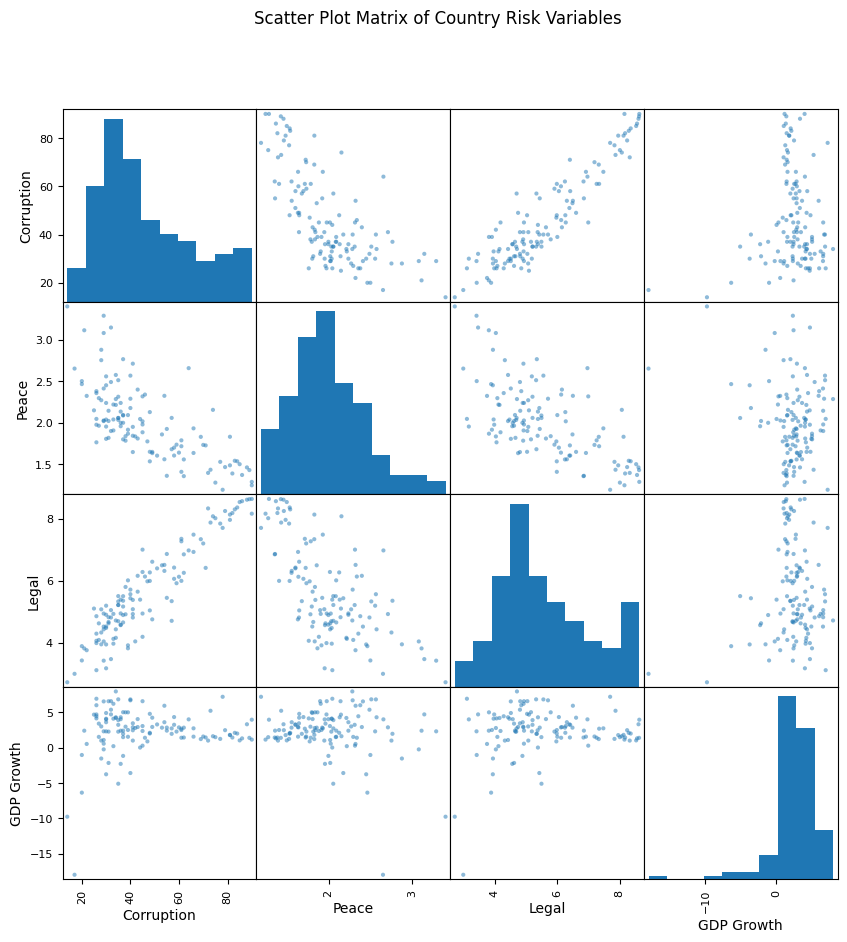

In [3285]:
#%%
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

features = ["Corruption", "Peace", "Legal", "GDP Growth"]

scatter_matrix(df[features], figsize=(10, 10), diagonal="hist")
plt.suptitle("Scatter Plot Matrix of Country Risk Variables")
plt.show()

### Scatter Plot Matrix Analysis

From the scatter plot matrix that was produced to show the relationship between the four risk indicators, several observations were to be made.

First, the relationship between corruption and legal seems to be the only indicators that showcase a strongly correlated relationship, suggesting the possibility of stronger legal systems tend to experiece lower levels of corruption. However, GDP growth's relationship with other variables display a vertically compressed patterns, reflection of how GDP stayed mostly constant and no change occured across these observations (weaker correlation due to points being more scattered).  

Other relationships such as peace & legal or peace & corruption shows moderately strong negative correlations between each other suggesting countries with stronger institutions tend to have lower levels of conflict risk.

In terms of clusters, there no visually defined plots that showcase the pattern, although some grouping patterns are somewhat visible. A few potential outliers can be observed, particularly in GDP growth where some countries display unusally low or high growth rates relative to the rest of the variables. 

OVerall, despite some relationships between variables showcase correlation, the graph representation alone cannot clearly define visible clusters. 

## Problem 1(b): Correlation Matrix

In [3286]:
# Calculate the correlation matrix for the selected features
features = ["Corruption", "Peace", "Legal", "GDP Growth"]

corr_matrix = df[features].corr()
corr_matrix

,Corruption,Peace,Legal,GDP Growth
Corruption,1.000000,-0.700477,0.923589,0.100742
Peace,-0.700477,1.000000,-0.651961,-0.200639
Legal,0.923589,-0.651961,1.000000,0.118305
GDP Growth,0.100742,-0.200639,0.118305,1.000000


### Correlation Matrix: Table Analysis

From the calculated table above, the correlation matrix confirms the observation made based on the graphical representation in Part A. Corruption and legal exhibit the strongest positive, around 0.92, followed up by GDP growth & Legal of 0.12 indicating a very weak positive association between the two variables. The correlation between corruption and legal intuitively makes sense as it aligns with the instrituional theory: countries with stronger legal systems tend to have better enforcement mechanisms, clearer property rights, and stronger rule of law which natrually aligns wtih lower corruption levels.


Now, in terms of strong negative correlation, the closest relationship variables are peace & corruption (-0.7) and peace & legal (-0.65). Intuitively, institutional stability often coincides wtih weaker governance structures. Countries experiencing conflicts or political instability may struggle in institutional strength and enforcement capacity, leading to higher corruption and weaker legal framework. 


### Problem 1(c): Why Standardization is Necessary

When extracting the four variables from the CSV file, one noticeable data observation between the variables are that they are all measured on different numerical scales. Corruption ranges from 0 to 100, while Peace ranges approximately from 1 to 5, and Legal ranges from 0 to 10. GDP Growth also has a smaller range compared to Corruption.

K-Means clustering is based on Euclidean distance. If the raw (unstandardized) data were used, features with larger numerical ranges would dominate the distance calculations. In this dataset, Corruption would have the greatest influence because its scale is much larger than the other variables.

As a result, clustering would be driven primarily by differences in Corruption rather than reflecting all four risk indicators equally. Standardizing the features ensures that each variable contributes equally to the clustering process.

# Problem 2: K-Means Clustering 

With examined relationship and correlation between the pairs of each varaible, K-Means clusttering algorithim is now applied to identify potential groupings of countries based on institutional and macroeconomic indicators. In addition, the data are standarized to ensure equal contribution to the distance calculations 

### Data preparation for K-Means Clustering

In [3287]:
# Extracting features and defining the target variable
X = df[['Corruption', 'Peace', 'Legal', 'GDP Growth']]
X.head()

,Corruption,Peace,Legal,GDP Growth
0,39,1.867,3.822,5.000
1,34,2.213,4.160,4.202
2,36,1.957,4.568,-2.298
3,33,2.218,4.126,0.208
4,79,1.465,8.244,2.471


In [3288]:
# Standardize the features before clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3289]:
# Temporary check to see the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()

,Corruption,Peace,Legal,GDP Growth
0,-0.379975,-0.306578,-1.199593,0.808020
1,-0.642472,0.469231,-0.971402,0.561381
2,-0.537473,-0.104778,-0.695954,-1.447586
3,-0.694971,0.480442,-0.994356,-0.673052
4,1.720000,-1.207951,1.785784,0.026378


# Problem 2(a):  Elbow Method 

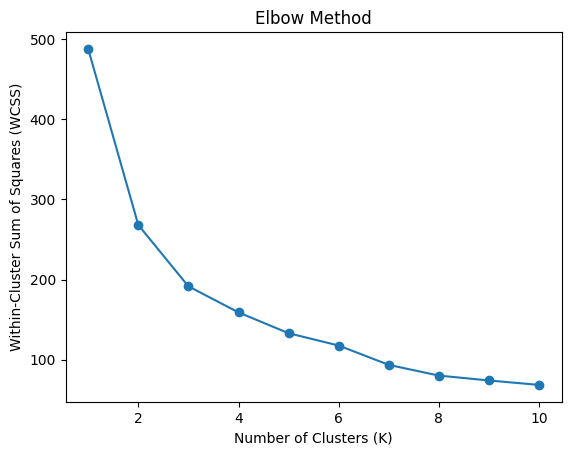

In [3290]:
# Determine the optimal number of clusters using the Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=338)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")
plt.show()

### Elbow Method Analysis

When analyzing the graphical repreesentation of the Elbow Method, the WCSS decreases sharply from K = 1 to K = 3, indicating that adding clusters significantly improves model fit in this range. After K = 3, the rate of decrease slows and the curve begins to flatten.

The most visible “elbow” occurs at K = 3, suggesting that three clusters provide a reasonable balance between model complexity and explanatory power. Additional clusters beyond K = 3 yield smaller reductions in WCSS, indicating diminishing returns.

# Problem 2(b): K-Means Clustering (K = 3)

The following table of cluster centers is reported in standardized units (z-scores). A positive centroid value means the cluster average is above the overall mean for that variable, while a negative value means it is below the mean. Because clustering was done on standardized data, the magnitudes are comparable across variables.

In [3291]:
# Based on the Elbow Method, we can choose K=3 for our final KMeans clustering
kmeans_final = KMeans(n_clusters=3, random_state=338)
kmeans_final.fit(X_scaled)

centers = pd.DataFrame( kmeans_final.cluster_centers_, columns=X.columns)

centers

,Corruption,Peace,Legal,GDP Growth
0,-0.975997,1.220638,-1.020964,-1.621975
1,1.231352,-0.979187,1.165956,0.006201
2,-0.476224,0.264203,-0.425998,0.414118


In [3292]:
# Assign cluster labels to the original DataFrame
df["Cluster"] = kmeans_final.labels_

df[["Country", "Cluster"]].head(122)

,Country,Cluster
0,Albania,2
1,Algeria,2
2,Argentina,0
3,Armenia,0
4,Australia,1
...,...,...
117,Venezuela,0
118,Vietnam,2
119,Yemen,0
120,Zambia,2


## K-Means Clustering (K = 3): Cluster Interpretation
### Summary of Clusters 
- Cluster 1: strongest governance + strongest legal + most stable → lowest risk  
- Cluster 2: moderate institutions + higher growth → moderate risk / growth tradeoff  
- Cluster 0: weak institutions + least stable + lowest growth → highest risk

### Variable interpretation 
- Corruption: higher values indicate *cleaner governance / less corruption risk*.
- Peace: higher values indicate *higher conflict/instability (less peace)*.
- Legal: higher values indicate *stronger rule of law and institutions*.
- GDP Growth: higher values indicate *stronger recent economic growth*.

---

### Cluster 0: High-Risk / Weak Institutions & Low Growth
**Centroid:** Corruption = -0.976, Peace = +1.221, Legal = -1.021, GDP Growth = -1.622

Overall interpretation:  
This cluster represents higher-risk countries: weaker governance and institutions, elevated instability, and weaker growth performance. In an investment-risk context, these features typically correspond to higher political/legal risk and greater uncertainty for long-term investment, and may be associated with more volatile outcomes.


### Cluster 1: Low-Risk / Strong Institutions & Stable Environment
Centroid: Corruption = +1.231, Peace = -0.979, Legal = +1.166, GDP Growth = +0.006

Overall interpretation:  
This cluster represents lower-risk, institutionally strong countries. Strong legal systems and low corruption risk create an environment where economic transactions are more reliable, and lower instability supports long-term planning. In investment terms, this cluster looks like stable, well-governed markets.


### Cluster 2: Moderate-Risk / Transitional or Emerging Markets with Better Growth
Centroid: Corruption = -0.476, Peace = +0.264, Legal = -0.426, GDP Growth = +0.414

**Overall interpretation:**  
This cluster likely represents emerging or transitional economies where growth prospects are stronger, but governance and legal systems are still developing. From an investment-risk perspective, this group often involves a tradeoff: potentially higher returns due to growth opportunities, but moderate institutional and stability risks.


# Problem 2(c): Listing Countries in each Cluster

In [3293]:
# Group countries by their assigned cluster
cluster_groups = df.groupby("Cluster")["Country"].apply(list)

# Summary table showing the countries in each cluster and the count of countries per cluster
cluster_table = pd.DataFrame({
    "Cluster": ["Cluster 0: High Risk", "Cluster 1: Low Risk", "Cluster 2: Moderate Risk"],
    "Countries": [
        ", ".join(cluster_groups[0]),
        ", ".join(cluster_groups[1]),
        ", ".join(cluster_groups[2])
    ],
    "Count": [len(cluster_groups[0]), len(cluster_groups[1]), len(cluster_groups[2])]
})

cluster_table

,Cluster,Countries,Count
0,Cluster 0: High Risk,"Argentina, Armenia, Azerbaijan, Brazil, Burund...",17
1,Cluster 1: Low Risk,"Australia, Austria, Belgium, Botswana, Canada,...",39
2,Cluster 2: Moderate Risk,"Albania, Algeria, Bahrain, Bangladesh, Benin, ...",66


## Countries in Each Cluster Analysis

### Cluster 0 (High Risk / Fragile States):
The centroid values for this cluster indicates below average legal quality and peace scores, combined with higher corruption levels and weaker or more volatile economic performance. The following countries that are grouped under this cluster showcase weak insitutational environment and higher eocnomic risk:

**Venezuela**: Venezuela’s placement is intuitive given its prolonged economic contraction, hyperinflation, and institutional breakdown. The country has experienced severe GDP decline and weakening rule of law, which aligns with the cluster’s strongly negative GDP growth and legal indicators. 

**Argentina**: Repeated sovereign debt crises, currency instability, and volatile economic performance. While not a failed state, its macroeconomic instability and weaker institutional reliability make its classification reasonable

**Democratic Republic of Congo**: Faces persistent conflict and weak governance structures. Its low peace and legal scores are consistent with the cluster’s below-average institutional quality


### Cluster 1 (Low Risk / Developed economies):
The centroid values for this cluster shows well aboved legal quality and peace score indicating strong governance structures and insitutional stability. The follow countries grouped under this cluster showcase these characteristics:

**Canada**: Strong rule of law, transparent governance framework, and high institutional stability. Its peaceful political environment and predictable regulatory system align closely with the cluster’s positive legal and peace scores

**Germany**:  Its rule-of-law framework ensures property rights protection and predictable enforcement of commercial agreements. These institutional strengths reduce transaction uncertainty and align with the cluster’s high standardized Legal score. Furthermore, Germany’s stable parliamentary democracy and relatively low corruption levels correspond to the positive Corruption index value observed in the cluster centroid. 

**Japan**: Advanced legal infrastructure, political stability, and mature economy explain its placement. Although GDP growth may not always be high, its institutional stability makes it structurally low-risk.

### Cluster 2 (Emerging / Transitional Economies):
The centroid for this cluster suggests moderate institutional quality, neither strongly positive nor strongly negative, and mixed economic growth performance. The following countries group under this cluster demonstrates this with their characteristics: 

**Bangladesh**:  The country has experienced strong GDP growth over the past decade but continues to face governance and corruption challenges. This combination of economic momentum with institutional constraints aligns with the cluster’s moderate centroid values.

**Algeria**: While Algeria benefits from natural resource revenues, particularly hydrocarbons, its economic structure is heavily state dependent and vulnerable to commodity price fluctuations. The governance framework is centralized, and legal transparency can be inconsistent. Political reforms have been gradual, and economic diversification remains limited

**Albania**: Undergone institutional reforms and legal modernization efforts. However, corruption concerns and governance capacity constraints persist. Economic growth exists but remains sensitive to external conditions and domestic political developments


# Problem 2(d): Plotting Silhouette Score

To further evaluate the appropriate number of clusters, we compute the silhouette score for K = 2 to K = 10. The silhouette score measures how well each observation fits within its assigned cluster compared to other clusters. A negative value suggests potential misclassification, a value of zero indicates overlapping clusters while a value close to 1 indicate that overservations are matched to their own cluster and are clearly seperated. 

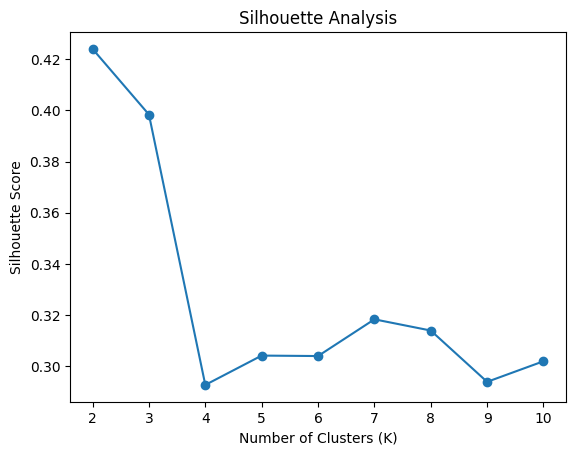

In [3294]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for K=2 to K=10
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=338)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

### Silhouette Analysis

After computing the silhouette scores for different values of K, we observe that the highest score occurs at K = 2 (approximately 0.42). 
The score declines for K = 3 (around 0.40) and drops more sharply for K ≥ 4, stabilizing at lower values thereafter. According to silhouette analysis, the optimal number of clusters is K = 2 as it maximizes cluster seperation and cohesion. HOWEVER, this is different when compared to the Elbow method as it suggested K = 3 despite the differences of 0.2, causing both method to disagree with each other. 

In this context of comparison, both methods give a different representation. In the silhouette method, it focuses on two qualities, cohesion and seperation. These two qualities help identifiy where or not a point is closer to its own cluster than the nearest other cluster. When the data showcase K = 2, it gave a clean split, demonstrating that the data has a very song "two-group" structure, and when K is forced to equal to 3, one of these two distinct groups are splited into two subgroups resulting in silhouette to drop and a reason to choose an extra cluster just because it's "possible". Despite silhouette seems better, Elbow is recommended instead since the anaylsis of data is not only just about statistics but rather more for an interpretation of listed countries. When K = 2, silhouette may overly simplified solutions where in a low/medium/high risk structure, it might lump both medium and high risk together which may lead to bad decision making when it comes to politics. In addition to this, the marginal difference in terms of cluster quality is quite small, resulting them to be both statistically reasonable where there's not really a strong solution to pick one over the other. 

# Problem 3: Hierarchical Clustering 

To further validate the clustering structure identified using K-Means, hierarchical clustering is applied to the same standardized dataset. Unlike K-Means, which requires the number of clusters to be specified in advance, hierarchical clustering builds a full merge history of the data. This allows us to visually examine the natural grouping structure through a dendrogram and assess whether the number of clusters chosen in Problem 2 is supported by an alternative clustering method.

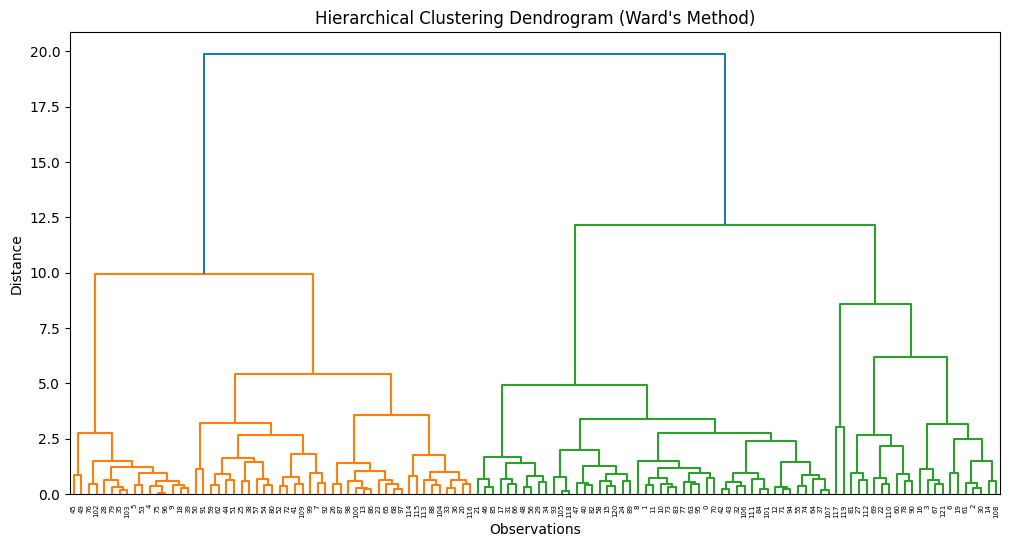

In [3295]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering using Ward's linkage
Z = linkage(X_scaled, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

## Hierarchical Clustering: Diagram Analysis

### Cut Height for K = 3 Clusters

When analyzing the produced graphical representation, the dendrogram visualizes the sequence of merges between observations. The vertical axis represents the linkage distance at which clusters are merged. Cutting the dendrogram at a particular height corresponds to selecting a level of dissimilarity beyond which clusters are no longer merged.

To obtain the same number of clusters as the K-Means solution (K = 3), we draw a horizontal line across the dendrogram and identify the height at which exactly three distinct branches remain. Visually, cutting the tree at approximately height 12 produces three well-separated clusters.

### Large Gaps Interpretation 

A large gap in the dendrogram means how big of a jump in merge height betwween two consecutive merges where small gaps represents clusters are being merged fairly similar while big gaps represents how algorithim forces the clusters to merge despite them being less similar. When analyzing the graph, there are 2 identifiable gaps, one at the very top of the dendrogram, a jump from 12 to 20, and a secondary gap from 5 to 12. In the first gap, the final merge happens around distance 20, where two large distinct groups are combined into one cluster that resulted a very large increase in dissimilarity indicated by the difference of 8 in terms of distance.  The second gap happens when branch merges around distance 10. Despite the gap distance is smaller compared to the first gap, its internally cohesive characteristics is not enough to determine that the clusters are very similar. Instead, it indicates that the clusters can be divded further into three clusters that preserves more detailed structural infromation in the data. 


# Problem 3(b): Cutting Dendogram

In [3296]:
from scipy.cluster.hierarchy import fcluster

h_labels = fcluster(Z, 3, criterion='maxclust')

In [3297]:
# Store Cluster Labels in Dataframe
df['KMeans'] = kmeans_final.labels_
df['Hierarchical'] = h_labels

In [3298]:
# Cross Tabulation 
pd.crosstab(df['KMeans'], df['Hierarchical'])

Hierarchical,1,2,3
KMeans,,,
0,0,0,17
1,39,0,0
2,14,47,5


In [3299]:
# Aligning Cluster Labels
mapping = {1:1, 2:2, 3:0}
df['H_matched'] = df['Hierarchical'].map(mapping)

# Commute Aggreement
same = (df['KMeans'] == df['H_matched']).sum()
total = len(df)
different = total - same

print(f"Same cluster: {same} ({same/total:.2%})")
print(f"Different cluster: {different} ({different/total:.2%})")

df[df['KMeans'] != df['H_matched']][['Country','KMeans','Hierarchical']]

Same cluster: 103 (84.43%)
Different cluster: 19 (15.57%)


,Country,KMeans,Hierarchical
7,Bahrain,2,1
22,Colombia,2,3
25,Cyprus,2,1
38,Georgia,2,1
41,Greece,2,1
50,Israel,2,1
51,Italy,2,1
52,Jamaica,2,1
54,Jordan,2,1
67,Mauritania,2,3


## Comparing Cluster Assignments

After cutting the hierarchical dendogram into three clusters to match the K-Means solution, both methods were compared. Following the alignment of custer labels, 103 out of 122 countries (84.43%) were assigned to the same cluster by both K-Means and hierarchical clustering. The remaining 19 countries (15.57%) were classified differently. 

When analyzing the mismatches shown in the table above, mismatches usually occur within the mderate risk cluster. Many of the coutries assigned differently by the two methods are classified as moderate risk under K-Means but are grouped into either the high-risk or low-risk cluster under hierarchical clustering

Using three clusters in both K-Means and hierarchical clustering, we compared the cluster assignments using a cross-tabulation.

The results show that 39 countries are assigned to the same cluster by both methods.

Two of the clusters show very strong agreement between K-Means and hierarchical clustering. However, one cluster is split across multiple hierarchical clusters, indicating some differences in how borderline countries are grouped.

This difference is expected because:

- K-Means minimizes within-cluster variance using centroids.
- Hierarchical clustering (Ward’s method) merges observations step-by-step based on distance.

Countries that lie near cluster boundaries may therefore be assigned differently depending on the clustering approach.

Overall, the clustering structure is broadly consistent across both methods.

## Problem 3(c): Comparing K-Means and Hierarchical Clustering

K-Means and hierarchical clustering are both distance-based clustering methods, but they differ in how clusters are formed.

### K-Means

- Requires specifying the number of clusters (K) in advance.
- Optimizes cluster centers (centroids) to minimize within-cluster variance.
- Computationally efficient and works well for larger datasets.
- Sensitive to initial starting values and outliers.
- Produces compact, spherical clusters.

### Hierarchical Clustering (Ward's Method)

- Does not require pre-specifying the number of clusters.
- Produces a dendrogram that shows the full merging history.
- More computationally intensive for large datasets.
- Once clusters are merged, the decision cannot be reversed.
- Provides a visual tool (dendrogram) to identify natural grouping structures.

### When to Prefer Each Method

- K-Means is preferred when the dataset is large and a clear number of clusters is known or estimated.
- Hierarchical clustering is useful when exploring the data structure and identifying a natural number of clusters.

In this analysis, both methods produced broadly consistent groupings, suggesting that the cluster structure in the data is reasonably stable.

## Problem 4(a): Risk Ranking of Clusters

Based on the standardized cluster centers from K-Means (K = 3), we can rank the clusters from lowest risk to highest risk using the institutional indicators (Corruption, Peace, Legal, GDP Growth).

Cluster Centers (standardized units):

Cluster 0:
- Corruption: -0.48  
- Peace: 0.26  
- Legal: -0.44  
- GDP Growth: 0.38  

Cluster 1:
- Corruption: 1.23  
- Peace: -0.98  
- Legal: 1.17  
- GDP Growth: 0.01  

Cluster 2:
- Corruption: -1.03  
- Peace: 1.35  
- Legal: -1.06  
- GDP Growth: -1.72  

### Risk Interpretation

Assuming:
- Higher corruption → higher risk  
- Lower peace → higher risk  
- Weaker legal systems → higher risk  
- Extremely volatile GDP growth may also increase risk  

### Ranking (Lowest to Highest Risk)

1. **Cluster 1 (Lowest Risk)**  
   - Very strong legal institutions (+1.17)
   - Low corruption (high corruption score may mean cleaner institutions depending on coding direction)
   - Moderate GDP growth
   - Overall strongest institutional profile

2. **Cluster 0 (Medium Risk)**  
   - Moderate institutional quality
   - Slightly weaker legal environment
   - Moderate GDP growth
   - Represents middle-income or transitioning economies

3. **Cluster 2 (Highest Risk)**  
   - Weak legal institutions (-1.06)
   - Lower institutional strength overall
   - Negative GDP growth (-1.72)
   - Suggests fragile or politically unstable economies

Overall, Cluster 1 appears most institutionally stable, while Cluster 2 represents the highest structural risk.

## Problem 4(b): Investment Implications

If advising an institutional investor seeking to diversify an emerging markets portfolio, the clustering results provide a structured way to group countries by institutional and macroeconomic risk characteristics.

### How Investors Could Use the Clusters

1. Risk-Based Allocation  
   The clusters can be used to allocate capital according to risk tolerance:
   - Low-risk cluster → Core portfolio holdings
   - Medium-risk cluster → Tactical or moderate-growth exposure
   - High-risk cluster → Opportunistic or high-risk/high-return positions

2. Diversification Across Risk Profiles  
   Instead of selecting countries individually, investors could ensure exposure across different clusters to avoid concentration in one institutional risk profile.

3. Country Screening Tool  
   The clusters serve as a first-pass screening mechanism. Investors can narrow their universe before conducting deeper fundamental analysis.

4. Risk Monitoring  
   If a country’s indicators change over time and it moves between clusters, that may signal improving or deteriorating institutional quality.

---

### Limitations of Using Only These Four Indicators

1. Limited Variable Scope  
   The model only includes Corruption, Peace, Legal, and GDP Growth.  
   It ignores:
   - Inflation
   - Debt levels
   - Currency risk
   - Political regime changes
   - Market liquidity
   - Sector composition

2. Static Snapshot  
   The clustering is based on one period of data.  
   Institutional risk is dynamic and can change rapidly.

3. Equal Weighting from Standardization  
   StandardScaler implicitly gives equal importance to all variables.  
   Investors may care more about legal strength than GDP growth volatility.

4. Clustering Is Unsupervised  
   The algorithm groups countries based on statistical similarity, not actual investment returns.  
   Similar institutional profiles do not guarantee similar market performance.

---

### Conclusion

The clustering framework is useful as a structured risk segmentation tool, but it should complement — not replace — deeper macroeconomic and financial analysis.

Institutional investors should use the clusters as a starting point for portfolio construction rather than a standalone decision rule.

REFERENCE OF RANDOM
## K-Means Clustering (K = 3): Cluster Interpretation

---

### Cluster 0: High-Risk / Weak Institutions & Low Growth
**Centroid:** Corruption = -0.976, Peace = +1.221, Legal = -1.021, GDP Growth = -1.622

Cluster 0 is characterized by **substantially below-average governance quality** and **institutional strength**, combined with **high instability** and **weak economic growth**.  
- The **negative Corruption score (-0.976)** suggests countries in this cluster tend to have **more corruption risk** (i.e., weaker transparency and governance relative to the dataset average).  
- The **high Peace score (+1.221)** indicates **lower peace / greater conflict or political instability**, which can raise uncertainty and disrupt investment or business activity.  
- The **negative Legal score (-1.021)** suggests **weak legal institutions**, meaning contracts may be harder to enforce and property rights may be less protected.  
- The most extreme feature here is **GDP Growth (-1.622)**, indicating **significantly below-average growth**, consistent with environments facing macroeconomic stress, crisis exposure, or poor conditions for sustained development.

**Overall interpretation:**  
This cluster represents **higher-risk countries**: weaker governance and institutions, elevated instability, and weaker growth performance. In an investment-risk context, these features typically correspond to **higher political/legal risk and greater uncertainty for long-term investment**, and may be associated with more volatile outcomes.

---

### Cluster 1: Low-Risk / Strong Institutions & Stable Environment
**Centroid:** Corruption = +1.231, Peace = -0.979, Legal = +1.166, GDP Growth = +0.006

Cluster 1 stands out as the **strongest institutional and governance cluster** with a relatively **stable environment**.  
- **Corruption is strongly positive (+1.231)**, implying these countries have **much cleaner governance** (lower corruption risk) compared to the average.  
- **Peace is negative (-0.979)**, which suggests these countries are generally **more peaceful and stable** (lower conflict risk).  
- **Legal is strongly positive (+1.166)**, indicating **strong rule of law**, better contract enforcement, and stronger investor protections.  
- **GDP Growth is near zero (+0.006)**, meaning growth is **about average**—these countries may not be the highest growth markets, but they tend to be **stable and predictable**.

**Overall interpretation:**  
This cluster represents **lower-risk, institutionally strong countries**. Strong legal systems and low corruption risk create an environment where economic transactions are more reliable, and lower instability supports long-term planning. In investment terms, this cluster looks like **stable, well-governed markets**.

---

### Cluster 2: Moderate-Risk / Transitional or Emerging Markets with Better Growth
**Centroid:** Corruption = -0.476, Peace = +0.264, Legal = -0.426, GDP Growth = +0.414

Cluster 2 appears to sit **between Cluster 0 and Cluster 1**, with **moderately weaker institutions** but **above-average growth**.  
- **Corruption (-0.476)** and **Legal (-0.426)** are both slightly below average, suggesting **institutional quality is not as strong** as Cluster 1, but notably **not as weak** as Cluster 0.  
- **Peace (+0.264)** is slightly above average, implying **some elevated instability risk**, but far less severe than Cluster 0.  
- **GDP Growth (+0.414)** is above average, suggesting these countries have **stronger recent growth** and may offer **higher growth potential**.

**Overall interpretation:**  
This cluster likely represents **emerging or transitional economies** where growth prospects are stronger, but governance and legal systems are still developing. From an investment-risk perspective, this group often involves a **tradeoff**: potentially higher returns due to growth opportunities, but **moderate institutional and stability risks**.

---

### Summary of Clusters 
- **Cluster 1:** strongest governance + strongest legal + most stable → **lowest risk**  
- **Cluster 2:** moderate institutions + higher growth → **moderate risk / growth tradeoff**  
- **Cluster 0:** weak institutions + least stable + lowest growth → **highest risk**

### Variable interpretation 
- **Corruption:** higher values indicate *cleaner governance / less corruption risk*.
- **Peace:** higher values indicate *higher conflict/instability (less peace)*.
- **Legal:** higher values indicate *stronger rule of law and institutions*.
- **GDP Growth:** higher values indicate *stronger recent economic growth*.